# Bike Sharing System

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Data Understanding


### Interpretation of Variables
Some of the variables are explained:

      season : the current season 1-spring, 2-summer, 3-fall, 4-winter
	  
      yr : year (0- 2018, 1-2019)
	  
      mnth : month numberv ( between 1 and 12)
	  
      holiday : weather day is a holiday or not
      
	  weekday : day of the week (between 0 and 6)
      
	  workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	  weathersit : weather situation 
      
		  1: Clear, Few clouds, Partly cloudy, Partly cloudy
		  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain & Scattered clouds
		  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
          
	  temp : temperature in Celsius
      
	  atemp: feeling temperature in Celsius
      
	  hum: humidity
      
	  windspeed: wind speed
      
	  casual: count of casual users
      
	  registered: count of registered users
      
	  cnt: -total rental bikes( including both casual and registered ). It is only considered for all the analysis operations.
	

In [1]:
#Import statements

import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


# Supress Warnings
warnings.filterwarnings('ignore')

#Retrieving data from the CSV file
bikesdf=pd.read_csv("C:/Upg_Assignment2/day.csv")
print(bikesdf.head(10))


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   
5        6  06-01-2018       1   0     1        0        4           1   
6        7  07-01-2018       1   0     1        0        5           1   
7        8  08-01-2018       1   0     1        0        6           0   
8        9  09-01-2018       1   0     1        0        0           0   
9       10  10-01-2018       1   0     1        0        1           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.

### Data Cleaning and Modification

In [2]:
#Display the information 
bikesdf.info()
#All the columns consists of non-null values. So there is no requirement of eliminating any columns or rows.

#Date, instant, yr, casual and registered variables can be removed from the dataset.
#They  seem to be unrelated. 

bikesdf.drop(['dteday','instant', 'yr', 'casual','registered'],axis=1,inplace=True)
#Change in data type is required as the column season consists of integer values- 1,2,3 or 4

bikesdf['season']=bikesdf['season'].astype(str)
bikesdf.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 1

In [3]:
#Display the description of the given dataset
bikesdf.describe()


,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Visualizing the Data


<Figure size 1440x1152 with 0 Axes>

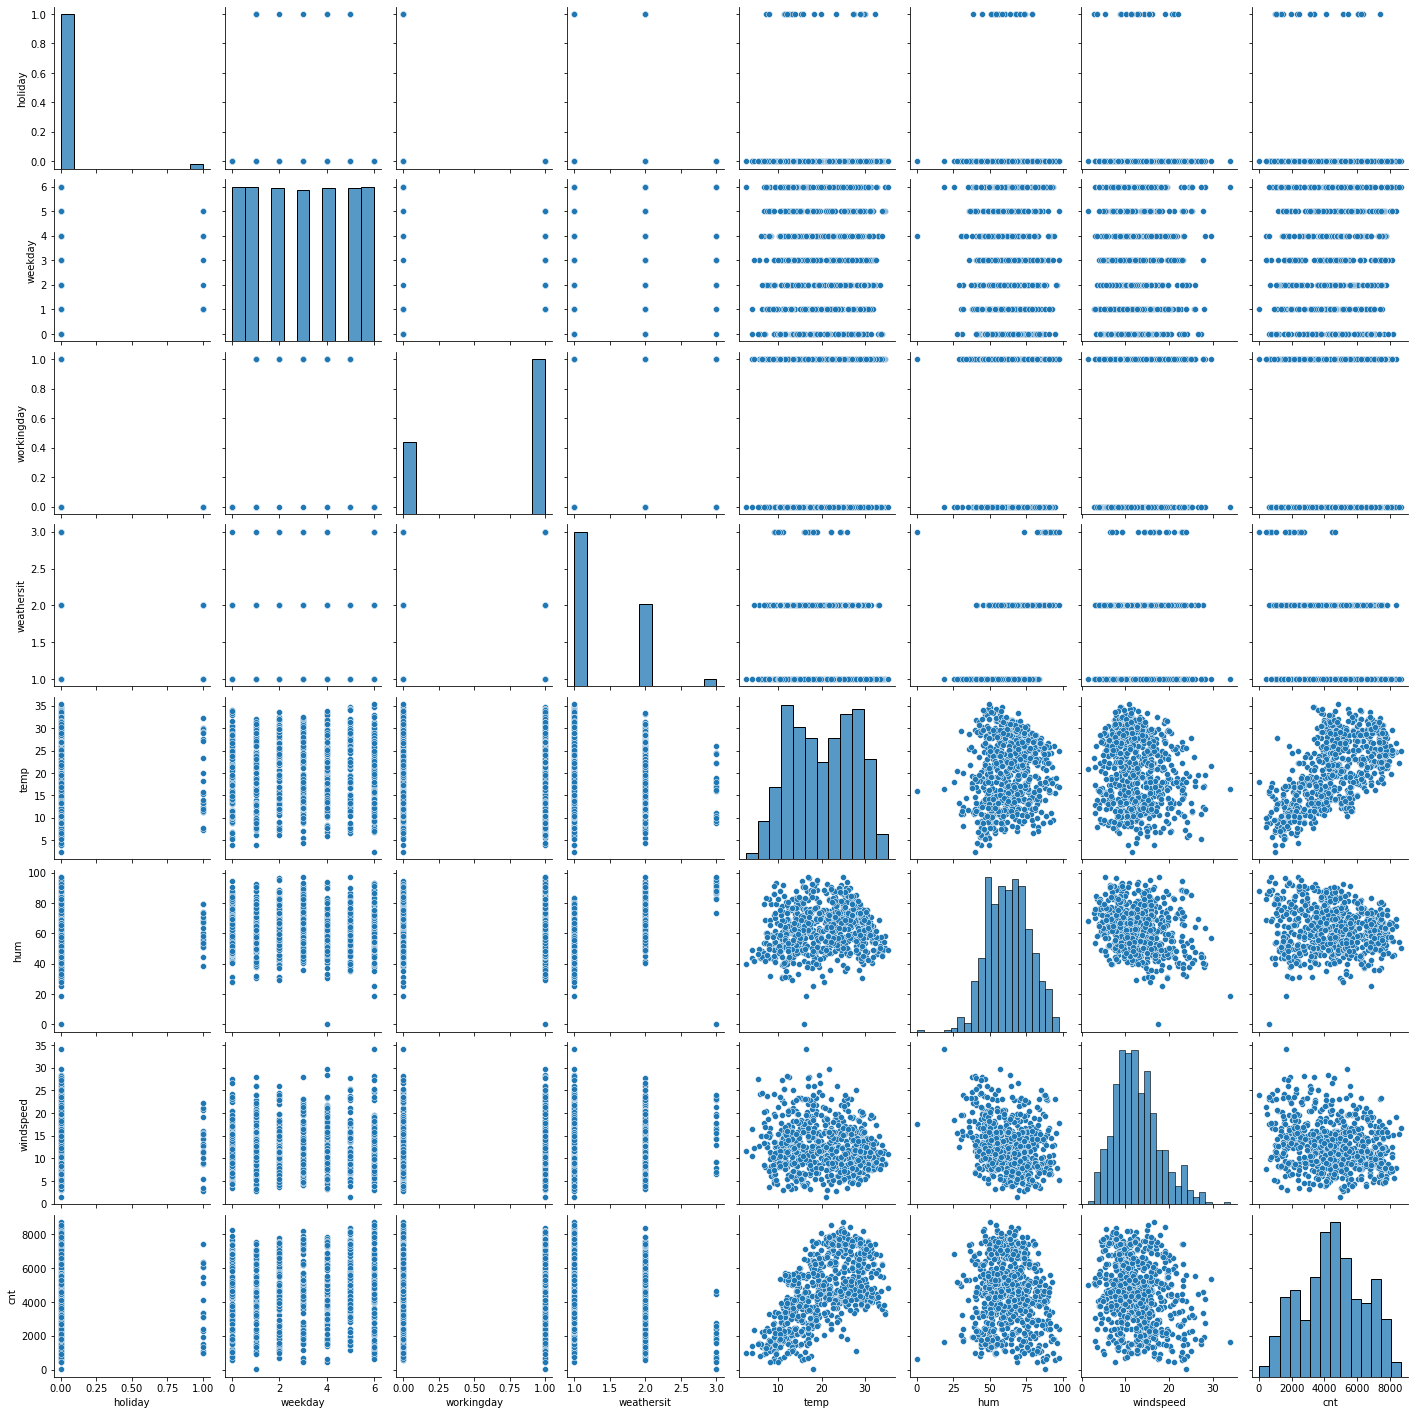

In [4]:
#Generating a pair plot
plt.figure(figsize=(20,16))
bikesdf_sn=bikesdf.loc[:,['season','holiday','weekday','workingday','weathersit','temp','hum','windspeed','cnt']]
sns.pairplot(bikesdf_sn)
plt.show()


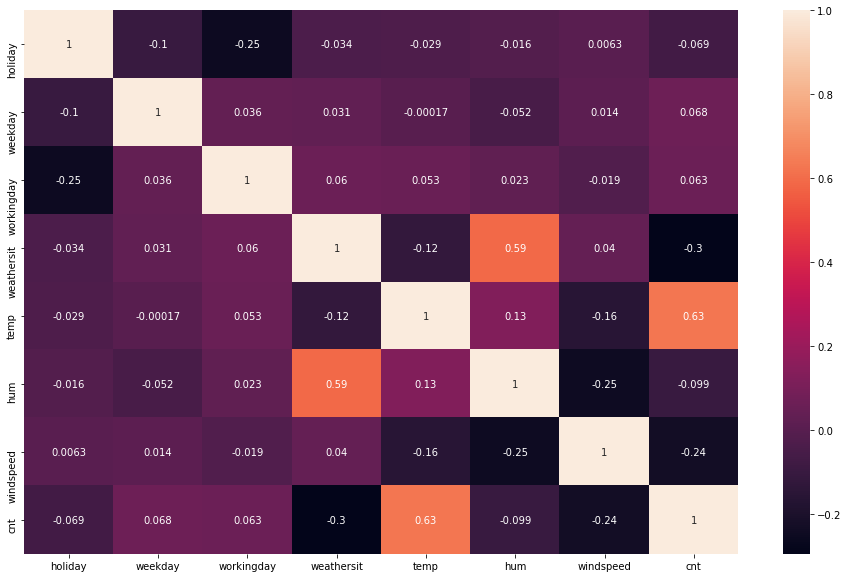

In [5]:
#Generating Heat map 
plt.figure(figsize = (16, 10))
sns.heatmap(bikesdf_sn.corr(), annot = True)
plt.show()


### Creation of Dummy Variables

In [6]:
#Change the datatype of season column is done earlier

def binary_map(x):
    return x.map({'1':'spring', '2':'summer', '3':'fall', '4':'winter'})

varlist=['season']

# Applying the function to the bikes dataframe
bikesdf[varlist] = bikesdf[varlist].apply(binary_map)
print(bikesdf.head())

status = pd.get_dummies(bikesdf['season'], drop_first = True)

print(status)


   season  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring     1        0        6           0           2  14.110847   
1  spring     1        0        0           0           2  14.902598   
2  spring     1        0        1           1           1   8.050924   
3  spring     1        0        2           1           1   8.200000   
4  spring     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  
     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0

### Adding dummy columns to the main dataset

In [7]:
#Adding the dummy columns to the dataframe and removing 'season' column

bikesdf = pd.concat([bikesdf, status], axis = 1)

bikesdf.drop(['season'], axis = 1, inplace = True)
print(bikesdf.head())

   mnth  holiday  weekday  workingday  weathersit       temp     atemp  \
0     1        0        6           0           2  14.110847  18.18125   
1     1        0        0           0           2  14.902598  17.68695   
2     1        0        1           1           1   8.050924   9.47025   
3     1        0        2           1           1   8.200000  10.60610   
4     1        0        3           1           1   9.305237  11.46350   

       hum  windspeed   cnt  spring  summer  winter  
0  80.5833  10.749882   985       1       0       0  
1  69.6087  16.652113   801       1       0       0  
2  43.7273  16.636703  1349       1       0       0  
3  59.0435  10.739832  1562       1       0       0  
4  43.6957  12.522300  1600       1       0       0  


### Splitting the Data into Training and Testing Sets


In [8]:

# To keep the same rows in the train and test data sets always
np.random.seed(0)
bikesdf_train, bikesdf_test = train_test_split(bikesdf, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bikesdf_train.shape)
print(bikesdf_test.shape)


(510, 13)
(219, 13)


### Rescaling the Features

In [9]:
#Rescaling is to be done so that the units of the coefficients obtained are all on the same scale.
scaler = MinMaxScaler()
#Only numeric variales are kept excluding 'yes/no', '0/1' and dummy variables
numeric_vars = ['weathersit','temp','hum','windspeed','cnt']
bikesdf_train[numeric_vars] = scaler.fit_transform(bikesdf_train[numeric_vars])
print(bikesdf_train.head())

     mnth  holiday  weekday  workingday  weathersit      temp    atemp  \
653    10        0        2           1         0.0  0.509887  23.0423   
576     7        0        2           1         0.0  0.815169  33.1448   
426     3        0        6           0         0.5  0.442393  20.6746   
728    12        0        0           0         0.0  0.245101  11.5850   
482     4        0        6           0         0.5  0.395666  18.8752   

          hum  windspeed       cnt  spring  summer  winter  
653  0.575354   0.300794  0.864243       0       0       1  
576  0.725633   0.264686  0.827658       0       0       0  
426  0.640189   0.255342  0.465255       1       0       0  
728  0.498067   0.663106  0.204096       1       0       0  
482  0.504508   0.188475  0.482973       0       1       0  


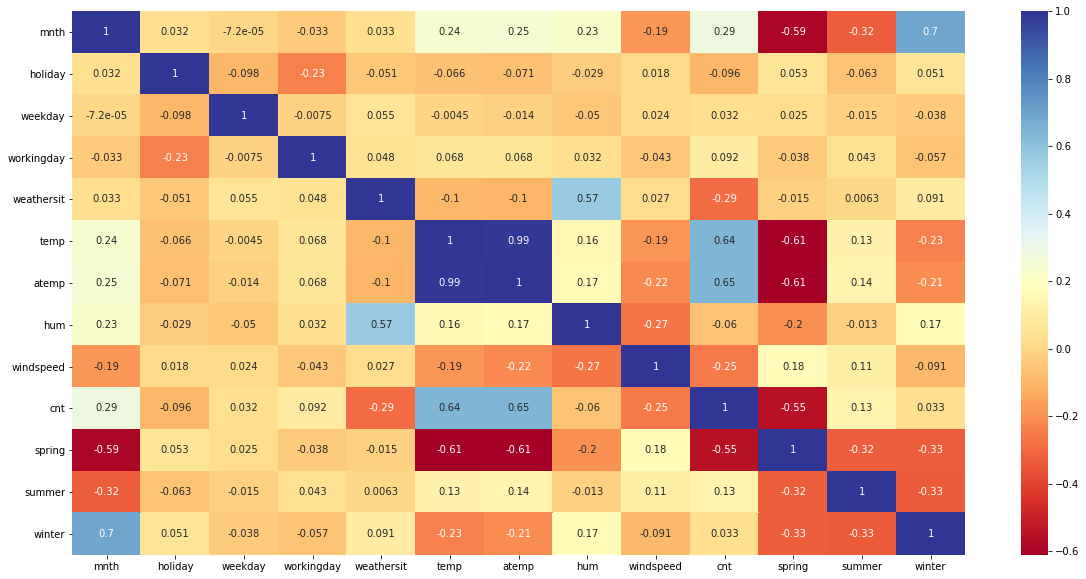

In [10]:
# To check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bikesdf_train.corr(), annot = True, cmap="RdYlBu")
plt.show()

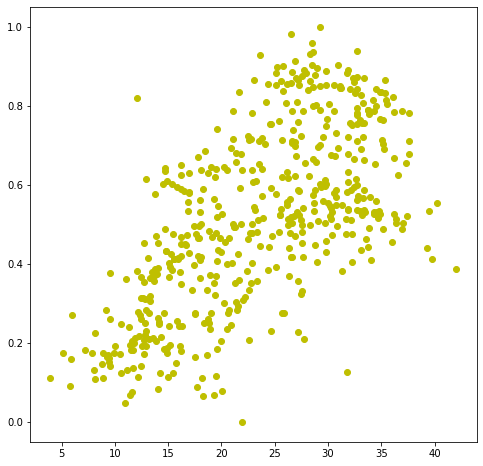

In [11]:
#It can be observed by the above heatmap that 'cnt' is highly correlated 'atemp'. It seems to be quite logical also.
#Following is a scatter chart for depicting the relationship between the two features- 'cnt' and 'atemp'
plt.figure(figsize=[8,8])
plt.scatter(bikesdf_train.atemp, bikesdf_train.cnt,c="y")
plt.show()

In [12]:
#So atemp can  be considered as the first feautre to start for the analysis
#To remove cnt column (feature) and treat it as a dependent variable
y_train = bikesdf_train.pop('cnt')

#The remaining part of the dataframe consists of various independent variables
X_train = bikesdf_train

### Building a model using Top down approach-- adding the appropriate features one by one

In [13]:
import statsmodels.api as sm

# Adding a constant for determiming the intercept
X_train_lm = sm.add_constant(X_train[['atemp']])

# To create a first fit model
lr = sm.OLS(y_train, X_train_lm).fit()

#To display the intercept and coefficient for the feature
print(lr.params)

const    0.091970
atemp    0.017947
dtype: float64


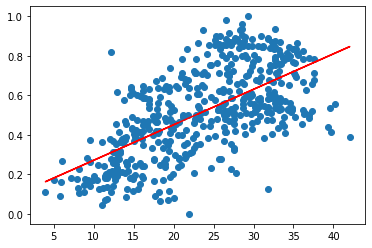

In [14]:
# To visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm['atemp'], y_train)
plt.plot(X_train_lm['atemp'], 0.091970 + 0.017947*X_train_lm['atemp'], 'r')
plt.show()


In [15]:
#  Following is the summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           1.10e-61
Time:                        21:11:43   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0920      0.023      3.939      0.0

The R-squared value obtained is 0.418. Since so many variables are there, so a better result can be obtained by adding more features one by one and checking the R-squared value, Prob (F-statistic) , Probablity (P>|t| )  etc. 

## Feature Selection using RFE (Recursive Feature Elimination) approach

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

#To determine top 7 features
rfe = RFE(lm, 7)             # running RFE
rfe = rfe.fit(X_train                                                                               , y_train)

In [17]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1)]

In [18]:
supported_cols = X_train.columns[rfe.support_]
print(supported_cols)

Index(['holiday', 'weathersit', 'temp', 'hum', 'windspeed', 'summer',
       'winter'],
      dtype='object')


In [19]:
unsupported_cols = X_train.columns[~rfe.support_]
print(unsupported_cols)

Index(['mnth', 'weekday', 'workingday', 'atemp', 'spring'], dtype='object')


### Building the RFE model


In [20]:
# Creating X_train dataframe with RFE supported variables
X_train_rfe = X_train[supported_cols]

# Adding a constant  
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [21]:
#Displaying the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     90.49
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           7.66e-85
Time:                        21:11:44   Log-Likelihood:                 246.64
No. Observations:                 510   AIC:                            -477.3
Df Residuals:                     502   BIC:                            -443.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3638      0.044      8.323      0.0

In [22]:
#hum seems to be insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

#Repeating the above process

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#The summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     99.85
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           2.03e-82
Time:                        21:11:44   Log-Likelihood:                 238.52
No. Observations:                 510   AIC:                            -463.0
Df Residuals:                     503   BIC:                            -433.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2231      0.027      8.359      0.0

In [23]:
#holiday seems to be insignificant in presence of other variables; can be dropped
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

#Repeating the above process

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#The summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     104.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           8.03e-85
Time:                        21:11:44   Log-Likelihood:                 244.17
No. Observations:                 510   AIC:                            -474.3
Df Residuals:                     503   BIC:                            -444.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3603      0.044      8.218      0.0

#### Analysis 
There is no significant change in the statistical results obtained by the elimination of the two features. So it can be concluded that the above features are suitable for the model.

In [24]:
# Calculate the Variance Inflation Factor for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features    VIF
0       const  43.03
3         hum   1.82
1  weathersit   1.63
6      winter   1.24
2        temp   1.20
4   windspeed   1.17
5      summer   1.14


###  Evaluating the above model


#### Applying the scaling on the test sets




In [25]:
numeric_vars = ['weathersit','temp','hum','windspeed','cnt']

bikesdf_test[numeric_vars] = scaler.transform(bikesdf_test[numeric_vars])
print(bikesdf_test.head())

     mnth  holiday  weekday  workingday  weathersit      temp     atemp  \
184     7        1        1           0         0.5  0.831783  33.27085   
535     6        0        3           1         0.0  0.901354  36.04875   
299    10        0        4           1         0.5  0.511964  22.85230   
221     8        0        3           1         0.0  0.881625  34.24915   
152     6        0        4           1         0.0  0.817246  32.19710   

          hum  windspeed       cnt  spring  summer  winter  
184  0.657364   0.084219  0.692706       0       0       0  
535  0.610133   0.153728  0.712034       0       1       0  
299  0.837699   0.334206  0.303382       0       0       1  
221  0.437098   0.339570  0.547400       0       0       0  
152  0.314298   0.537414  0.569029       0       1       0  


In [26]:
y_test = bikesdf_test.pop('cnt')
X_test = bikesdf_test


In [27]:
print(X_test.head())
print(X_train_new.columns)

     mnth  holiday  weekday  workingday  weathersit      temp     atemp  \
184     7        1        1           0         0.5  0.831783  33.27085   
535     6        0        3           1         0.0  0.901354  36.04875   
299    10        0        4           1         0.5  0.511964  22.85230   
221     8        0        3           1         0.0  0.881625  34.24915   
152     6        0        4           1         0.0  0.817246  32.19710   

          hum  windspeed  spring  summer  winter  
184  0.657364   0.084219       0       0       0  
535  0.610133   0.153728       0       1       0  
299  0.837699   0.334206       0       0       1  
221  0.437098   0.339570       0       0       0  
152  0.314298   0.537414       0       1       0  
Index(['const', 'weathersit', 'temp', 'hum', 'windspeed', 'summer', 'winter'], dtype='object')


### Checking on the test-set (evaluation of the model)

In [28]:
# To use the model for making predictions.

# Creating X_test_new dataframe by dropping variables from X_test
cols=['weathersit', 'temp', 'hum', 'windspeed', 'summer', 'winter']
X_test_new = X_test[cols]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)

#### Residual Analysis

Text(0.5, 0, 'Errors')

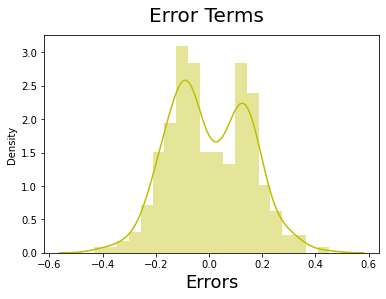

In [31]:
y_train_cnt = lm.predict(X_train_lm)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the residuals
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20,color="y")
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                        

Text(0, 0.5, 'y_pred')

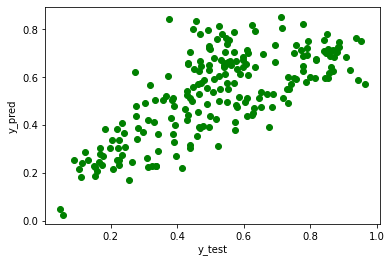

In [32]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,c="g")
plt.xlabel('y_test')                         
plt.ylabel('y_pred')   